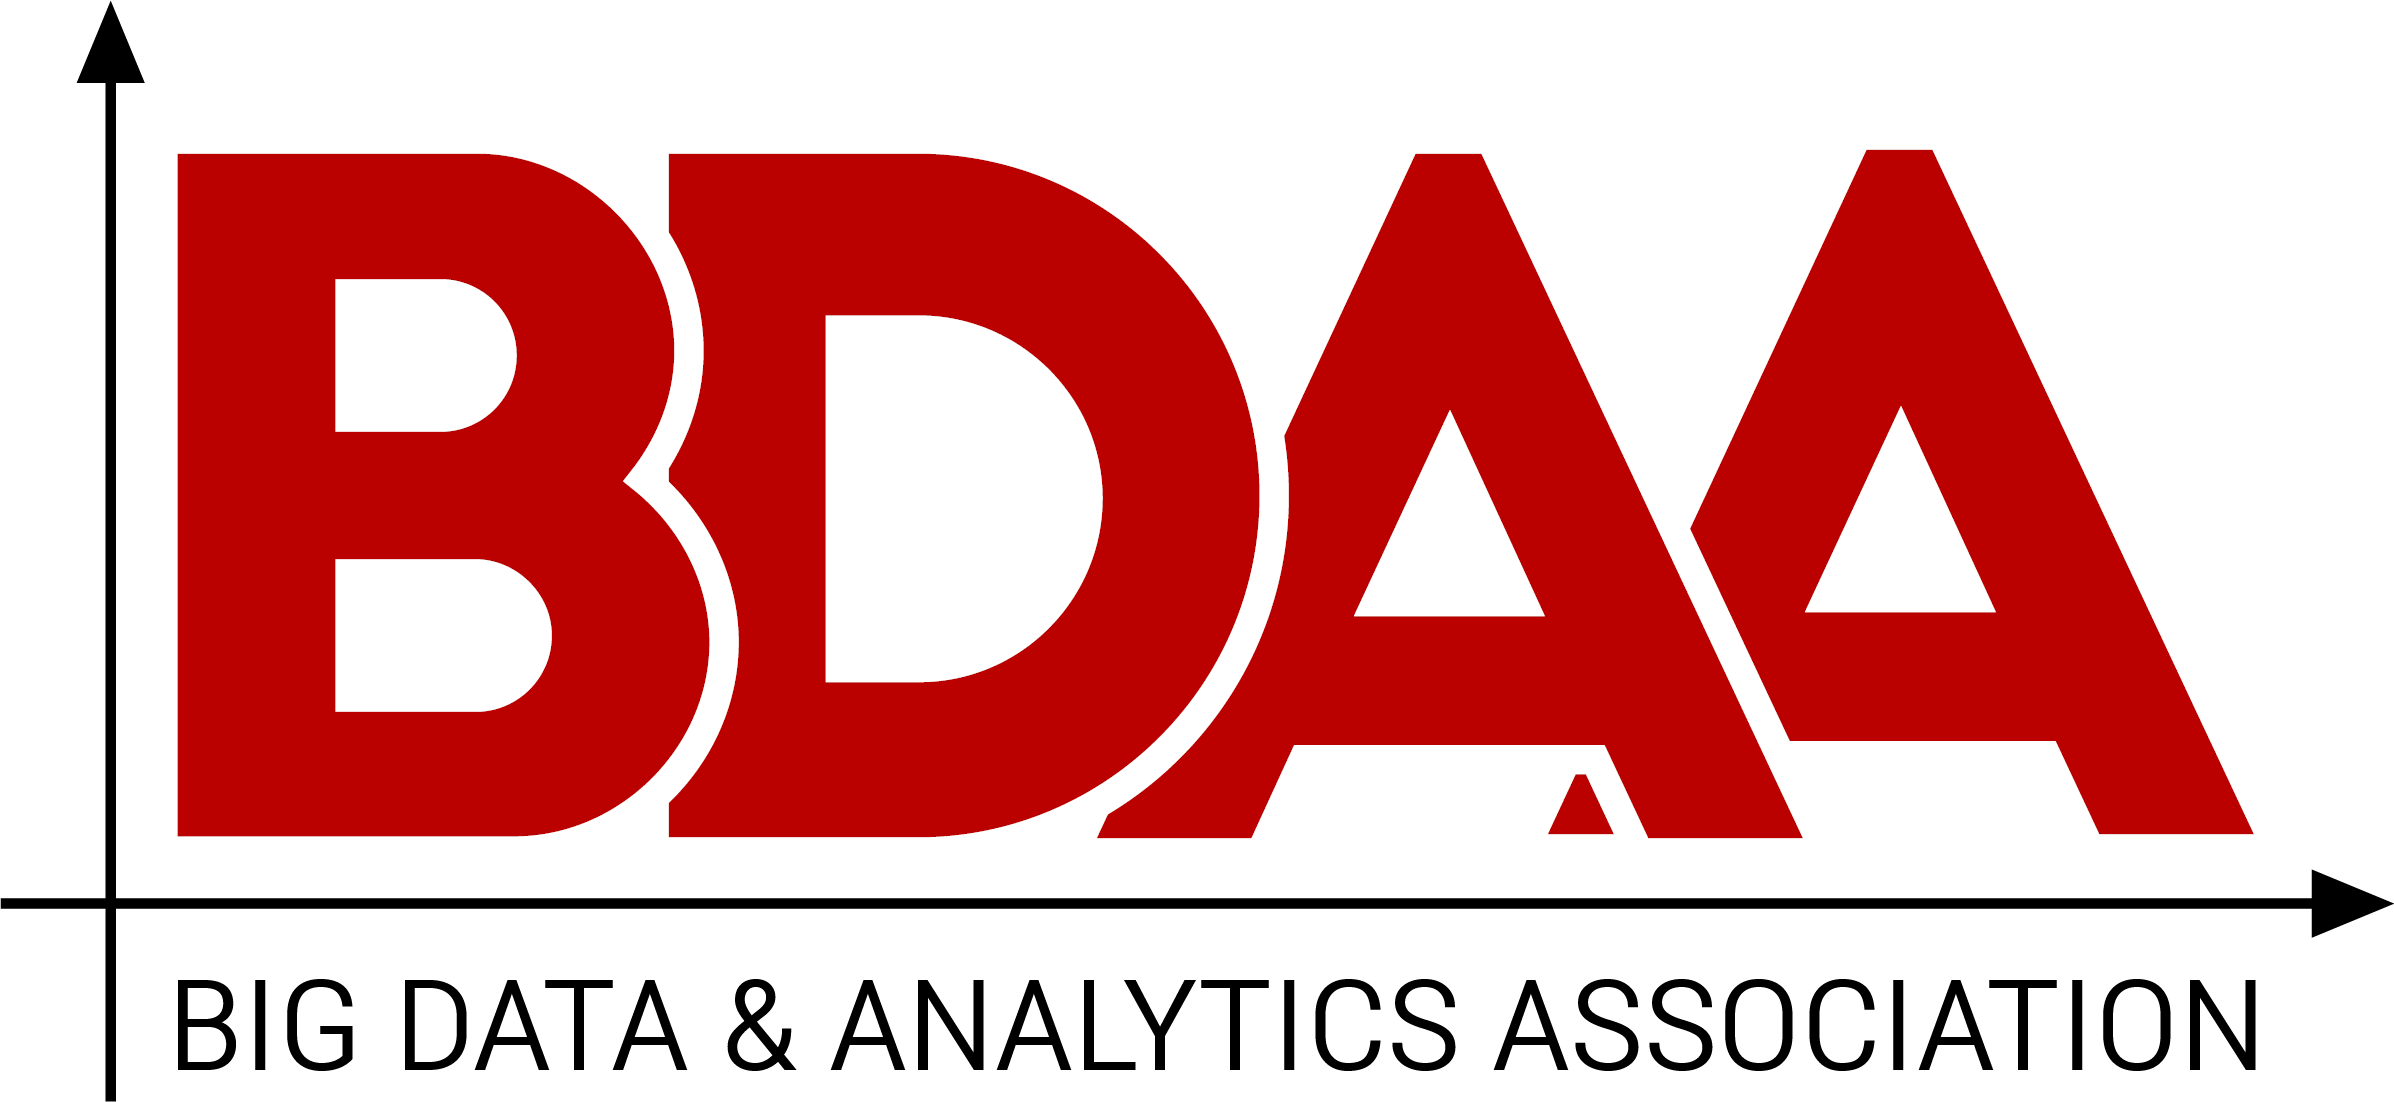

# Intro to Web Scraping - Topic II _Exercises_

Time to get your hands dirty, again!

Here's a another (dumb) question I have (which I can't ask Google the answer for):

_**Who is the 'most talented' actor, according to IMDB? More specifically, who is the actor that has starred the most in IMDB's top 250 movies?**_

With the magic of web scraping, this shouldn't take too long to find out. However, it will involve a new concept that we haven't covered yet, so strap in, and put your thinking caps on!

In [14]:
# Import all modules we expect to use
from bs4 import BeautifulSoup # BeautifulSoup is an HTML parser
import requests # requests.get allows us to connect to a website through Python
import pandas as pd # Pandas is a general data management module
import re # String cleanup
value_counts = lambda a: list(reversed(sorted(dict((i, a.count(i)) for i in a).items(), key=lambda x: x[1]))) 
# ^ Returns a sorted (descending) list of tuples (actor, movie count)

IMDB hosts a well-known list of the top 250 movies of all time, based on IMDB user ratings. [Let's check it out before we continue](https://www.imdb.com/chart/top).

What kind of information is available to us on this single page? It appears that a lot of great data is available, like:
 - Movie name
 - Year released
 - IMDB user rating
 - Position on the top 250 list
 - A small 'cover' image (MORE classification potential?)

There is undoubtedly some great analytics that could come out of just this information, but the data we want isn't available here! _What ever will we do!_ No need to fret, as thankfully we can find the full cast for each movie on [IMDB's dedicated cast and crew page](https://www.imdb.com/title/tt0111161/fullcredits/?ref_=tt_ov_st_sm) for each movie.

So far we've been keeping our entire scraping procedure to one webpage. However, a complete set of data for each 'record' that we will want in our dataset will often not be available on the same webpage. Being able to **navigate throughout a website** to find all the information you need is **a key skill in web scraping**, which is why we're going to practice using what you already know.

In this case, the IMDB top 250 list will serve as a compendium of 'movie IDs' that we can iterate through and build links off of.

To get a better idea of what this means, let's build a _BeautifulSoup_ object that will parse the following link:
 - https://www.imdb.com/chart/top

Under each comment, type the Python code that you think would execute the intended action.

In [2]:
# Open the IMDB link
r = requests.get('https://www.imdb.com/chart/top')
# Read the 'bytes' with BeautifulSoup's html parser and keep it as a bs4 object
soup = BeautifulSoup(r.content, 'html.parser')

After visiting a sample [cast and crew](https://www.imdb.com/title/tt0111161/fullcredits/?ref_=tt_ov_st_sm) pages and comparing their links, it becomes clear that uses an internal 'movieID' in their links to uniquely identify cast and crew pages. If we can isolate this ID (by scraping from the links on the main list), then we can build a link that will take us directly to the cast and crew pages.

Now let's look for links to individual movie pages. First of all, can we find an element on the page that acts as the 'container' for the information about each respective movie? 

Hint: You will want to use the _select()_ method for this element.
Hint: The length of the list of elements that is returned should be 250.

In [3]:
# Assign a list of containers to a variable
containers = soup.select(".titleColumn")

Now that we have our containers, we can iterate through them to grab the link in each one, and thus isolate the 'movieID'.

In [4]:
# Initialize a list that will contain links
links = []
# Write a for loop that iterates through the list of containers
for movie in containers:
    # Inside the for loop, find <a> tags and append the value of their 'href' to the links list
    links.append(movie.find('a')['href'])
# Use a list comprehension expression ([_ for _ in _]) to extract the ID from each link in the links list.
# Use re.search('tt.......', <list element>).group(0) to do this.
movie_ids = [re.search('tt.......', link).group(0) for link in links]
print(movie_ids)

['tt0111161', 'tt0068646', 'tt0071562', 'tt0468569', 'tt0050083', 'tt0108052', 'tt0167260', 'tt0110912', 'tt0060196', 'tt0137523', 'tt0120737', 'tt0109830', 'tt0080684', 'tt1375666', 'tt0167261', 'tt0073486', 'tt0099685', 'tt0133093', 'tt0047478', 'tt4154756', 'tt0317248', 'tt0076759', 'tt0114369', 'tt0102926', 'tt0038650', 'tt0118799', 'tt0114814', 'tt0245429', 'tt0120815', 'tt0110413', 'tt0120689', 'tt0816692', 'tt0120586', 'tt0054215', 'tt0064116', 'tt0021749', 'tt0034583', 'tt0027977', 'tt1675434', 'tt0253474', 'tt0407887', 'tt0103064', 'tt0088763', 'tt0082971', 'tt0047396', 'tt2582802', 'tt0172495', 'tt0110357', 'tt0482571', 'tt0209144', 'tt0078788', 'tt0078748', 'tt0032553', 'tt0095765', 'tt0043014', 'tt0095327', 'tt0057012', 'tt0405094', 'tt0050825', 'tt0081505', 'tt1853728', 'tt0910970', 'tt2380307', 'tt0119698', 'tt0169547', 'tt1345836', 'tt0051201', 'tt0364569', 'tt0090605', 'tt0087843', 'tt0082096', 'tt0033467', 'tt0052357', 'tt0053125', 'tt0112573', 'tt0105236', 'tt0086190'

Great! Now we have IMDBs internal ID for each movie on the top 250 list. Now we can move on to the next phase of this project, which is diving into cast and crew links to extract the actor list from each.

In [5]:
# Initialize a master list of actors
actors_master = []
# Write a for loop that iterates through the movie ids
for _id in movie_ids:
    print(_id)
    # Build a link to the cast and crew page and assign it to a new variable
    # Hint: The new link should be a concatenation of three parts: _ + id + _
    link = 'https://www.imdb.com/title/' + _id + '/fullcredits/?ref_=tt_ov_st_sm'
    # Open the cast and crew link
    r = requests.get(link)
    # Read the bytes with BeautifulSoup
    soup = BeautifulSoup(r.content, 'html.parser')
    # Explore the page on your own and find a class name that will allow us to select all actor names from the page.
    # Write a list comprehension that will pull the text from the list of elements (with each item in the list representing an element for an actor) and assign it to a list.
    actors = [element.get_text() for element in soup.select('.itemprop')]
    # If you pulled the data 'right', you will notice that actor names are duplicated in the list - 
    # Think of a Pythonic way to pull every other item from the list and reassign your variable! 
    # Hint: Stack Overflow is your friend!
    actors = actors[1::2]
    # Append (using the + operator) your list of actors from the current movie to the master list of actors
    actors_master = actors_master + actors

tt0111161
tt0068646
tt0071562
tt0468569
tt0050083
tt0108052
tt0167260
tt0110912
tt0060196
tt0137523
tt0120737
tt0109830
tt0080684
tt1375666
tt0167261
tt0073486
tt0099685
tt0133093
tt0047478
tt4154756
tt0317248
tt0076759
tt0114369
tt0102926
tt0038650
tt0118799
tt0114814
tt0245429
tt0120815
tt0110413
tt0120689
tt0816692
tt0120586
tt0054215
tt0064116
tt0021749
tt0034583
tt0027977
tt1675434
tt0253474
tt0407887
tt0103064
tt0088763
tt0082971
tt0047396
tt2582802
tt0172495
tt0110357
tt0482571
tt0209144
tt0078788
tt0078748
tt0032553
tt0095765
tt0043014
tt0095327
tt0057012
tt0405094
tt0050825
tt0081505
tt1853728
tt0910970
tt2380307
tt0119698
tt0169547
tt1345836
tt0051201
tt0364569
tt0090605
tt0087843
tt0082096
tt0033467
tt0052357
tt0053125
tt0112573
tt0105236
tt0086190
tt5311514
tt0022100
tt5074352
tt0180093
tt0086879
tt0986264
tt0211915
tt0066921
tt0056172
tt0338013
tt0036775
tt0075314
tt0062622
tt1187043
tt0045152
tt0114709
tt0093058
tt0056592
tt0361748
tt0040522
tt0070735
tt0012349
tt0435761


In [1]:
# Use the value_counts() function (defined in the imports section) to print a list of actors, sorted by their movie counts
print(value_counts(actors_master))
# Who is the 'most talented' actor by our metric? 
print(value_counts(actors_master)[0][0])
# Is this the best way to describe our results, or are there other explanations here?

NameError: name 'value_counts' is not defined